In [1]:
# Import necessary libraries
import pandas as pd

In [10]:
# Read source data "Details of probable/confirmed cases of COVID-19 infection in Hong Kong (English)".
csv_file = './data/enhanced_sur_covid_19_eng.csv'
df1 = pd.read_csv(csv_file)
df1.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [37]:
# Data Exploratory and Wrangling
df1.columns = ['case_no','report_date','date_of_onset','gender','age','name_of_hospital_admitted',
              'hospitalised_discharged_deceased','hk_nonhk_resident','case_classification','confirmed_probable']
df1.head()

,case_no,report_date,date_of_onset,gender,age,name_of_hospital_admitted,hospitalised_discharged_deceased,hk_nonhk_resident,case_classification,confirmed_probable
0,1,2020-01-23,21/01/2020,M,39,NaN,Discharged,Non-HK Resident,Imported case,Confirmed
1,2,2020-01-23,18/01/2020,M,56,NaN,Discharged,HK Resident,Imported case,Confirmed
2,3,2020-01-24,20/01/2020,F,62,NaN,Discharged,Non-HK Resident,Imported case,Confirmed
3,4,2020-01-24,23/01/2020,F,62,NaN,Discharged,Non-HK Resident,Imported case,Confirmed
4,5,2020-01-24,23/01/2020,M,63,NaN,Discharged,Non-HK Resident,Imported case,Confirmed


In [12]:
# Checking columns data type. report_date column should using datetime data type for Visualization.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case_no                           8482 non-null   int64  
 1   report_date                       8482 non-null   object 
 2   date_of_onset                     8482 non-null   object 
 3   gender                            8482 non-null   object 
 4   age                               8482 non-null   int64  
 5   name_of_hospital_admitted         0 non-null      float64
 6   hospitalised_discharged_deceased  8482 non-null   object 
 7   hk_nonhk_resident                 8482 non-null   object 
 8   case_classification               8482 non-null   object 
 9   confirmed_probable                8482 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 662.8+ KB


In [13]:
# Chanage report_date column to datetime data type
df1['report_date'] = pd.to_datetime(df1['report_date'], format='%d/%m/%Y')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case_no                           8482 non-null   int64         
 1   report_date                       8482 non-null   datetime64[ns]
 2   date_of_onset                     8482 non-null   object        
 3   gender                            8482 non-null   object        
 4   age                               8482 non-null   int64         
 5   name_of_hospital_admitted         0 non-null      float64       
 6   hospitalised_discharged_deceased  8482 non-null   object        
 7   hk_nonhk_resident                 8482 non-null   object        
 8   case_classification               8482 non-null   object        
 9   confirmed_probable                8482 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), obje

In [31]:
# Data Exploratory & Wrangling. Check data quality in hk_nonhk_resident column. 
# There are case sensitive issue in this column of data. 
df1.groupby(["hk_nonhk_resident"])["hk_nonhk_resident"].count()

hk_nonhk_resident
HK Resident          42
HK resident        8125
Non-HK Resident       7
Non-HK resident     307
Pending               1
Name: hk_nonhk_resident, dtype: int64

In [34]:
# Patch data to address case sensitive issue.
df1['hk_nonhk_resident'] = df1['hk_nonhk_resident'].str.replace('HK resident','HK Resident')
df1['hk_nonhk_resident'] = df1['hk_nonhk_resident'].str.replace('Non-HK resident','Non-HK Resident')
df1.groupby(["hk_nonhk_resident"])["hk_nonhk_resident"].count()

hk_nonhk_resident
HK Resident        8167
Non-HK Resident     314
Pending               1
Name: hk_nonhk_resident, dtype: int64

In [15]:
# Data Exploratory and Analysis. Group by report_date & gender to count number of cases.
df1.groupby(["report_date", "gender"])["report_date"].count()

report_date  gender
2020-01-23   M          2
2020-01-24   F          2
             M          1
2020-01-26   F          1
             M          2
                       ..
2020-12-23   M         28
2020-12-24   F         38
             M         33
2020-12-25   F         28
             M         29
Name: report_date, Length: 552, dtype: int64

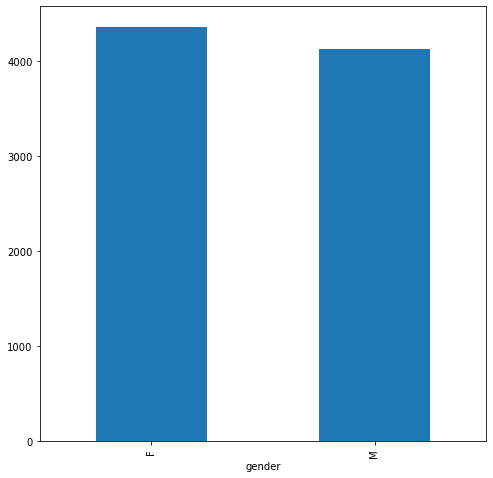

In [17]:
# Data Exploratory and Visualization. Group by gender and count number of cases and then present 
# in bar chart.
df1.groupby(['gender']).size().plot.bar(figsize=(8,8))

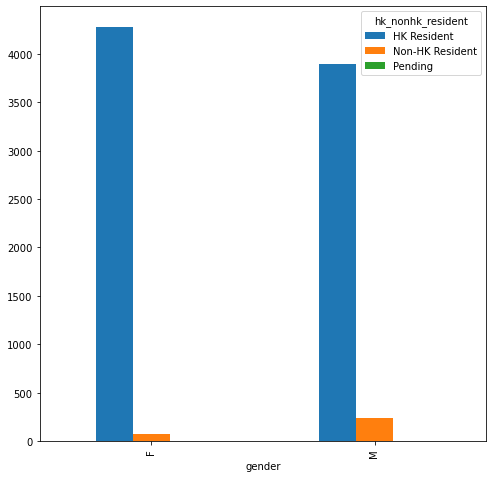

In [35]:
# Data Exploratory and Visualization. Group by gender & hk_nonhk_resident and count number of cases 
# and then present in bar chart.
pd.crosstab(df1['gender'],df1['hk_nonhk_resident']).plot.bar(figsize=(8,8))

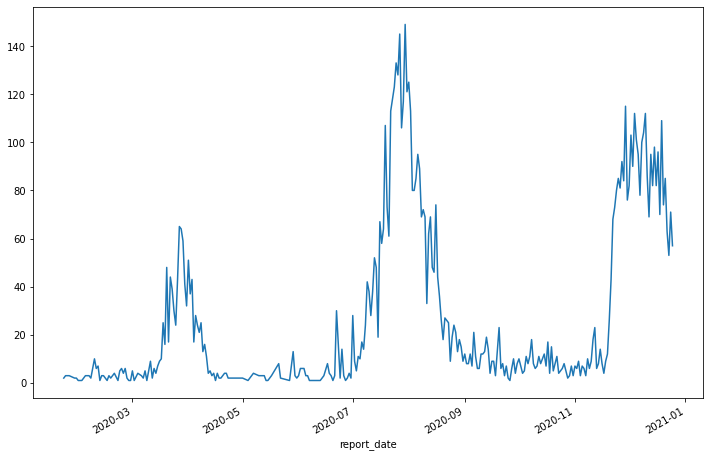

In [20]:
# Data Exploratory and Visualization. Group by report_data & cases count and then present in time series
# line chart.
df1.groupby(['report_date']).size().plot.line(figsize=(12,8))

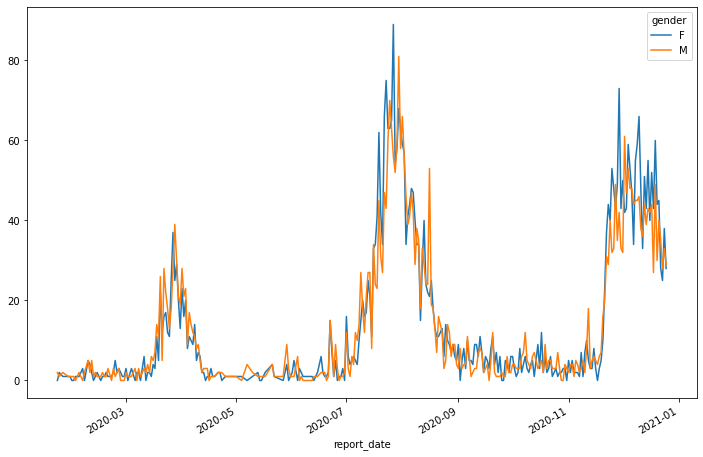

In [21]:
# Data Exploratory and Visualization. Group by report_data & gender & cases count and then present in 
# time series line chart.
pd.crosstab(df1['report_date'],df1['gender']).plot.line(figsize=(12,8))

In [44]:
# Data Exploratory & Wrangling. Explore the column case_classification.
df1.groupby(["case_classification"])["case_classification"].count()

case_classification
Epidemiologically linked with imported case            41
Epidemiologically linked with local case             4231
Epidemiologically linked with possibly local case      62
Imported case                                        1795
Local case                                           2250
Possibly local case                                   103
Name: case_classification, dtype: int64

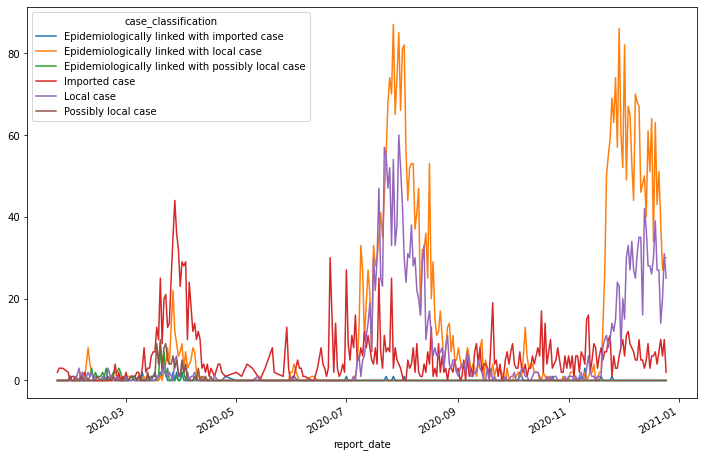

In [45]:
# Data Exploratory and Visualization. Group by report_data & case_classification & cases count and then 
# present in time series line chart.
pd.crosstab(df1['report_date'],df1['case_classification']).plot.line(figsize=(12,8))

In [253]:
# Read source data "Latest situation of reported cases of COVID-19 in Hong Kong (English)".
csv_file = './data/latest_situation_of_reported_cases_covid_19_eng.csv'
df2 = pd.read_csv(csv_file)
df2.head()

,As of date,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition
0,08/01/2020,12:00,0,21.0,17.0,38.0,0,0,0,NaN
1,09/01/2020,12:00,0,25.0,23.0,48.0,0,0,0,NaN
2,10/01/2020,12:00,0,31.0,23.0,54.0,0,0,0,NaN
3,11/01/2020,12:00,0,46.0,15.0,61.0,0,0,0,NaN
4,12/01/2020,12:00,0,51.0,16.0,67.0,0,0,0,NaN


In [254]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

In [255]:
# Data Exploratory and Wrangling
df2.columns = ['as_of_date','as_of_time','num_of_confirmed_cases','num_of_ruled_out_cases',
               'num_of_cases_still_hospitalised_for_investigation',
               'num_of_cases_fullfulling_the_reporting_criteria','num_of_death_cases','num_of_discharge_cases',
               'num_of_probable_cases','num_of_hospitalised_cases_in_critical_condition']
df2.head()

,as_of_date,as_of_time,num_of_confirmed_cases,num_of_ruled_out_cases,num_of_cases_still_hospitalised_for_investigation,num_of_cases_fullfulling_the_reporting_criteria,num_of_death_cases,num_of_discharge_cases,num_of_probable_cases,num_of_hospitalised_cases_in_critical_condition
0,08/01/2020,12:00,0,21.0,17.0,38.0,0,0,0,NaN
1,09/01/2020,12:00,0,25.0,23.0,48.0,0,0,0,NaN
2,10/01/2020,12:00,0,31.0,23.0,54.0,0,0,0,NaN
3,11/01/2020,12:00,0,46.0,15.0,61.0,0,0,0,NaN
4,12/01/2020,12:00,0,51.0,16.0,67.0,0,0,0,NaN


In [256]:
# Checking columns data type. report_date column should using datetime data type for Visualization.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   as_of_date                                         353 non-null    object 
 1   as_of_time                                         194 non-null    object 
 2   num_of_confirmed_cases                             353 non-null    int64  
 3   num_of_ruled_out_cases                             89 non-null     float64
 4   num_of_cases_still_hospitalised_for_investigation  89 non-null     float64
 5   num_of_cases_fullfulling_the_reporting_criteria    89 non-null     float64
 6   num_of_death_cases                                 353 non-null    int64  
 7   num_of_discharge_cases                             353 non-null    int64  
 8   num_of_probable_cases                              353 non-null    int64  
 9   num_of_hos

In [257]:
# Chanage report_date column to datetime data type
df2['as_of_date'] = pd.to_datetime(df2['as_of_date'], format='%d/%m/%Y')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   as_of_date                                         353 non-null    datetime64[ns]
 1   as_of_time                                         194 non-null    object        
 2   num_of_confirmed_cases                             353 non-null    int64         
 3   num_of_ruled_out_cases                             89 non-null     float64       
 4   num_of_cases_still_hospitalised_for_investigation  89 non-null     float64       
 5   num_of_cases_fullfulling_the_reporting_criteria    89 non-null     float64       
 6   num_of_death_cases                                 353 non-null    int64         
 7   num_of_discharge_cases                             353 non-null    int64         
 8   num_of_probable_case

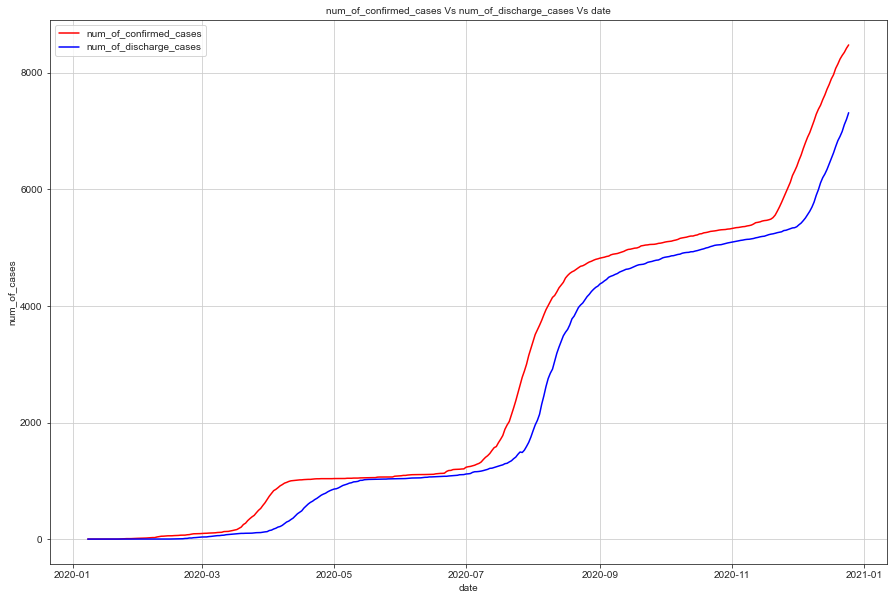

In [258]:
# Data Exploratory and Visualization. Group of num_of_confirmed_cases & num_of_discharge_cases & cases count 
# and then present in time series line chart.
plt.figure(figsize=(15,10))
plt.plot(df2.as_of_date, df2.num_of_confirmed_cases, color='red')
plt.plot(df2.as_of_date, df2.num_of_discharge_cases, color='blue')
plt.title('num_of_confirmed_cases Vs num_of_discharge_cases Vs date', fontsize=10)
plt.legend(['num_of_confirmed_cases', 'num_of_discharge_cases'], loc='upper left')
plt.xlabel('date', fontsize=10)
plt.ylabel('num_of_cases', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
# Data Exploratory and Visualization. Group of num_of_confirmed_cases & num_of_discharge_cases & cases count 
# and then present in time series line chart.
plt.figure(figsize=(15,10))
plt.plot(df2.as_of_date, df2.num_of_confirmed_cases, color='red')
plt.plot(df2.as_of_date, df2.num_of_discharge_cases, color='blue')
plt.title('num_of_confirmed_cases Vs num_of_discharge_cases Vs date', fontsize=10)
plt.legend(['num_of_confirmed_cases', 'num_of_discharge_cases'], loc='upper left')
plt.xlabel('date', fontsize=10)
plt.ylabel('num_of_cases', fontsize=10)
plt.grid(True)
plt.show()

In [53]:
# Import necessary libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# Read source data "Details of probable/confirmed cases of COVID-19 infection in Hong Kong (English)".
csv_file = './data/enhanced_sur_covid_19_eng.csv'
df3 = pd.read_csv(csv_file)
df3.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [55]:
# Data Exploratory and Wrangling
df3.columns = ['case_no','report_date','date_of_onset','gender','age','name_of_hospital_admitted',
              'hospitalised_discharged_deceased','hk_nonhk_resident','case_classification','confirmed_probable']
df3.head()

,case_no,report_date,date_of_onset,gender,age,name_of_hospital_admitted,hospitalised_discharged_deceased,hk_nonhk_resident,case_classification,confirmed_probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [56]:
# Chanage report_date column to datetime data type
df3['report_date'] = pd.to_datetime(df3['report_date'], format='%d/%m/%Y')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case_no                           8482 non-null   int64         
 1   report_date                       8482 non-null   datetime64[ns]
 2   date_of_onset                     8482 non-null   object        
 3   gender                            8482 non-null   object        
 4   age                               8482 non-null   int64         
 5   name_of_hospital_admitted         0 non-null      float64       
 6   hospitalised_discharged_deceased  8482 non-null   object        
 7   hk_nonhk_resident                 8482 non-null   object        
 8   case_classification               8482 non-null   object        
 9   confirmed_probable                8482 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), obje

In [57]:
# Duplicate report_date column to report_date_delta which is count down from day 0 to latest as we are 
# required to feed numeric value (float) to seaborn.
df3['report_date_delta'] = (df3['report_date'] - df3['report_date'].min())  / np.timedelta64(1,'D')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case_no                           8482 non-null   int64         
 1   report_date                       8482 non-null   datetime64[ns]
 2   date_of_onset                     8482 non-null   object        
 3   gender                            8482 non-null   object        
 4   age                               8482 non-null   int64         
 5   name_of_hospital_admitted         0 non-null      float64       
 6   hospitalised_discharged_deceased  8482 non-null   object        
 7   hk_nonhk_resident                 8482 non-null   object        
 8   case_classification               8482 non-null   object        
 9   confirmed_probable                8482 non-null   object        
 10  report_date_delta                 8482 non-null 

In [58]:
# Quick look into numeric value of report_date_delta. More or less, you can call it factorization.
df3.groupby(["report_date_delta"])["report_date_delta"].count()

report_date_delta
0.0       2
1.0       3
3.0       3
6.0       2
7.0       2
         ..
333.0    85
334.0    63
335.0    53
336.0    71
337.0    57
Name: report_date_delta, Length: 298, dtype: int64

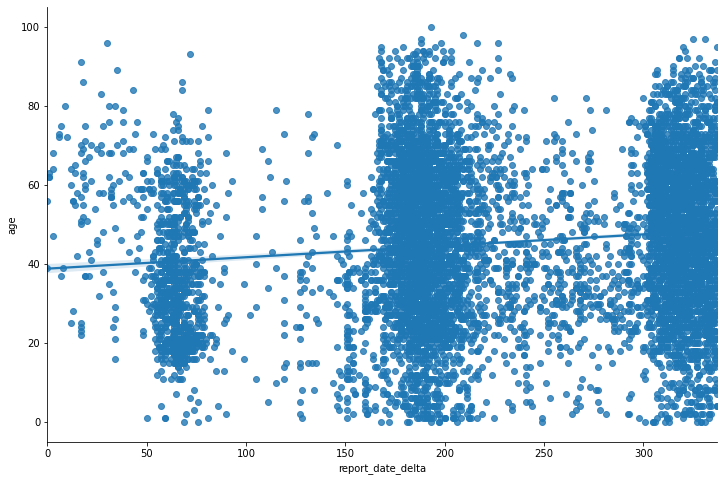

In [59]:
# Data Exploratory & Visualization. Plotting report_date_delta & age columns relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='report_date_delta', y= 'age', data=df3)
sns.despine()

In [60]:
# Data Analysis from Visualization.
# * There are 4 waves of COVID-19 in Hong Kong.
# * Wave 3 is obviously more serious than wave 2, and wave 3 is more less simliar as currently ware 4.
# * Seem have pattern around 100 days for each of the wave.
# * From wave 2 to 3, although the cases is trending down from end of ware 2. But, as long as still have low
# numbers of cases, it would make big impact in next wave.
# * From wave 3 to 4, similar as wave 2 to 3, cases is trending down, lower numbers of case, but it still 
# much more than number than previously wave gap. From wave 1 to 2 gap experience, it would make bigger
# result/impact in next wave (currently), hopefully not, god bless Hong Kong.
# * You can figure out the infacted peoples age is from originally around 40 and see trend is rising up recently.

In [61]:
# Data Exploratory & Wrangling. Check data quality in hk_nonhk_resident column. There are case sensitive issue in this column of data. 
df3.groupby(["case_classification"])["case_classification"].count()

case_classification
Epidemiologically linked with imported case            41
Epidemiologically linked with local case             4231
Epidemiologically linked with possibly local case      62
Imported case                                        1795
Local case                                           2250
Possibly local case                                   103
Name: case_classification, dtype: int64

In [62]:
# Duplicate case_classification to case_classification_float which trying to patch data to numeric values 
# by manually string value replacement and change column type to float. 
df3['case_classification_float'] = df3['case_classification']
df3['case_classification_float'] = df3['case_classification_float'].str.replace('Epidemiologically linked with imported case','0')
df3['case_classification_float'] = df3['case_classification_float'].str.replace('Epidemiologically linked with local case','1')
df3['case_classification_float'] = df3['case_classification_float'].str.replace('Epidemiologically linked with possibly local case','2')
df3['case_classification_float'] = df3['case_classification_float'].str.replace('Imported case','3')
df3['case_classification_float'] = df3['case_classification_float'].str.replace('Local case','4')
df3['case_classification_float'] = df3['case_classification_float'].str.replace('Possibly local case','5')
df3['case_classification_float'] = df3['case_classification_float'].astype(float)
df3.groupby(["case_classification_float"])["case_classification_float"].count()

case_classification_float
0.0      41
1.0    4231
2.0      62
3.0    1795
4.0    2250
5.0     103
Name: case_classification_float, dtype: int64

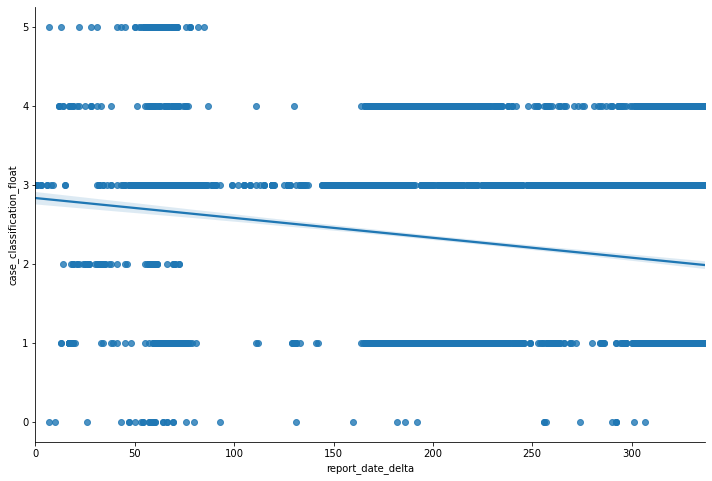

In [63]:
# Data Exploratory & Visualization. Plotting report_date_delta & case_classification_float columns 
# relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='report_date_delta', y= 'case_classification_float', data=df3)
sns.despine()

In [64]:
# Data Analysis from Visualization.
# * COVID-19 cases is orgionally from 'Imported Case' (3) and trending down to 
# 'Epidemiologically linked with possibly local case' (2).
# Trend down line from (3) to (2) also mean cases is coming from imported to local cases.
# 'Imported Case' (3) is never been stopped, and it would potentially turning more local cases.

In [65]:
# Data Exploratory & Wrangling. Check data quality in hk_nonhk_resident column. 
# There are case sensitive issue in this column of data. 
df3.groupby(["hk_nonhk_resident"])["hk_nonhk_resident"].count()

hk_nonhk_resident
HK Resident          42
HK resident        8125
Non-HK Resident       7
Non-HK resident     307
Pending               1
Name: hk_nonhk_resident, dtype: int64

In [67]:
# Patch data to address case sensitive issue.
df3['hk_nonhk_resident_float'] = df3['hk_nonhk_resident']
df3['hk_nonhk_resident_float'] = df3['hk_nonhk_resident_float'].str.replace('HK resident','HK Resident')
df3['hk_nonhk_resident_float'] = df3['hk_nonhk_resident_float'].str.replace('Non-HK resident','Non-HK Resident')
#df3['hk_nonhk_resident_float'] = df3['hk_nonhk_resident_float'].replace('-', '', regex=True)
df3.groupby(["hk_nonhk_resident_float"])["hk_nonhk_resident_float"].count()

hk_nonhk_resident_float
HK Resident        8167
Non-HK Resident     314
Pending               1
Name: hk_nonhk_resident_float, dtype: int64

In [68]:
# Instead of manually patching string values in column. Using panda factorize function to make string 
# into numeric values.
stacked = df3[['hk_nonhk_resident_float']].stack()
df3[['hk_nonhk_resident_float']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
df3['hk_nonhk_resident_float'] = df3['hk_nonhk_resident_float'].astype(float)
df3.groupby(["hk_nonhk_resident_float"])["hk_nonhk_resident_float"].count()

hk_nonhk_resident_float
0.0     314
1.0    8167
2.0       1
Name: hk_nonhk_resident_float, dtype: int64

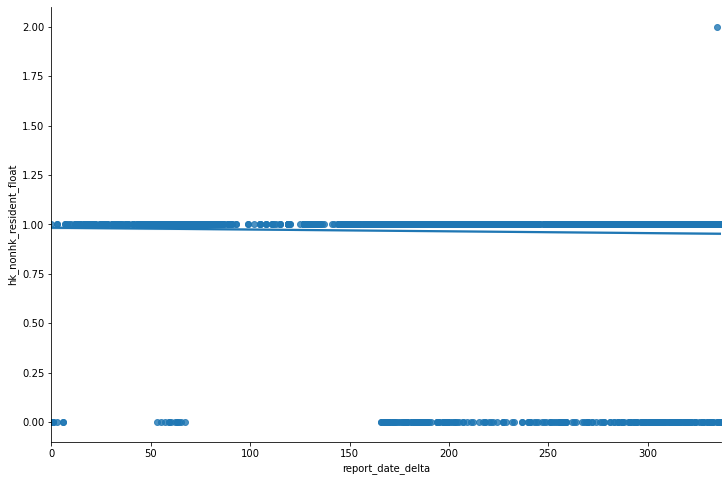

In [69]:
# Data Exploratory & Visualization. Plotting report_date_delta & hk_nonhk_resident columns. 
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='report_date_delta', y= 'hk_nonhk_resident_float', data=df3)
sns.despine()

In [71]:
# Data Analysis from Visualization.
# * Infacted case of 'HK Resident' (1) is from time to time.
# * With previously analysis, cases is trending from imported. Cross reference with this chart, seem 
# the imported cases is not from foreigner, they are HK Resident.
# * Around 200 days ago, there are 'Non-HK Resident' (0) cases coming up and until latest. That's similar 
# raising moment of wave 3.

In [55]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
import datetime

In [56]:
# Read source data "Residential buildings in which probable/confirmed cases have resided in the past 14 days 
# or non-residential building with 2 or more probable/confirmed cases in the past 14 days (English)".
csv_file = './data/building_list_eng.csv'
df4 = pd.read_csv(csv_file)
df4.head()

,District,Building name,Last date of residence of the case(s),Related probable/confirmed cases
0,Tsuen Wan,Sam Tung Uk Village,NaN,7293
1,Kowloon City,Merrington Mansion,NaN,7294
2,Sham Shui Po,Pei Ho Building,NaN,7296
3,Tai Po,"Wan Loi House, Wan Tau Tong Estate",NaN,7297
4,Sham Shui Po,"Pei Ho Building, Fuk Wa Street",NaN,7298


In [57]:
# Data Exploratory and Wrangling
df4.columns = ['district','building_name','last_date_of_residence_of_the_case','related_probable_confirmed_cases']
df4.head()

,district,building_name,last_date_of_residence_of_the_case,related_probable_confirmed_cases
0,Tsuen Wan,Sam Tung Uk Village,NaN,7293
1,Kowloon City,Merrington Mansion,NaN,7294
2,Sham Shui Po,Pei Ho Building,NaN,7296
3,Tai Po,"Wan Loi House, Wan Tau Tong Estate",NaN,7297
4,Sham Shui Po,"Pei Ho Building, Fuk Wa Street",NaN,7298


In [58]:
# Seem there are null value in last_date_of_residence_of_the_case column, let have a quick check.
len(df4) - df4.count()

district                                 0
building_name                            0
last_date_of_residence_of_the_case    1090
related_probable_confirmed_cases         0
dtype: int64

In [59]:
# Chanage last_date_of_residence_of_the_case column to datetime data type
df4['last_date_of_residence_of_the_case'] = pd.to_datetime(df4['last_date_of_residence_of_the_case'], format='%d/%m/%Y')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   district                            1536 non-null   object        
 1   building_name                       1536 non-null   object        
 2   last_date_of_residence_of_the_case  446 non-null    datetime64[ns]
 3   related_probable_confirmed_cases    1536 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 48.1+ KB


In [65]:
# Check related_probable_confirmed_cases column can be covert data type as numeric or not. This is important 
# for coming tables join view.
df4[pd.to_numeric(df4.related_probable_confirmed_cases, errors='coerce').isnull()]

,district,building_name,last_date_of_residence_of_the_case,related_probable_confirmed_cases
1090,Sham Shui Po,Nob Hill Square Betterment Banquet Hall (non-r...,2020-11-27,"5579, 5689, 5766, 5810, 5852, 5859, 5884, 5923..."
1091,Wan Chai,Hong Kong Sanatorium & Hospital (non-residential),2020-11-27,"5587, 5714, 5801, 6198, 6199, 6382, 6726"
1092,Eastern,Sai Wan Ho Municipal Services Building (non-re...,2020-11-27,"5783, 6494"
1093,Central & Western,Alexandra House Otto e Mezzo 8½ Bombana (non-r...,2020-11-27,"6072, 6160, 6172, 6176, 6177, 6182"
1094,Central & Western,Shun Tak Centre China Merchants Tower (non-res...,2020-11-27,"6247, 6259"
...,...,...,...,...
1505,Sha Tin,Lung Hang Market (non-residential),2020-12-19,"5909, 6778, 6779, 7286, 8341"
1506,Wong Tai Sin,Ngau Chi Wan Municipal Services Building (non-...,2020-12-19,"6882, 7028, 7113, 7439, 7569, 7688, 7756, 7771..."
1507,Kwun Tong,Sceneway Plaza (non-residential),2020-12-19,"7398, 7790, 8397"
1508,Wan Chai,Lockhart Road Market (non-residential),2020-12-19,"7493, 7939, 8075, 8304"


In [ ]:
# As expected, very bad situation, there are muliple number in related_probable_confirmed_cases column and separate 
# case number with comma.

In [61]:
# Transform related_probable_confirmed_cases column data (case number with comma) into multiple rows.

# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

# calculate lengths of splits
lens = df4['related_probable_confirmed_cases'].str.split(',').map(len)

# create new dataframe, repeating or chaining as appropriate
df4a = pd.DataFrame({'district': np.repeat(df4['district'], lens),
                    'building_name': np.repeat(df4['building_name'], lens),
                    'last_date_of_residence_of_the_case': np.repeat(df4['last_date_of_residence_of_the_case'], lens),
                    'related_probable_confirmed_cases': chainer(df4['related_probable_confirmed_cases'])})

In [66]:
# Check related_probable_confirmed_cases column can be covert data type as numeric or not again.
df4a[pd.to_numeric(df4a.related_probable_confirmed_cases, errors='coerce').isnull()]

,district,building_name,last_date_of_residence_of_the_case,related_probable_confirmed_cases


In [63]:
# Convert related_probable_confirmed_cases column as numeric data type. That is important for coming tables join view.
df4a[['related_probable_confirmed_cases']] = df4a[['related_probable_confirmed_cases']].apply(pd.to_numeric)
df4a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1535
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   district                            1952 non-null   object        
 1   building_name                       1952 non-null   object        
 2   last_date_of_residence_of_the_case  862 non-null    datetime64[ns]
 3   related_probable_confirmed_cases    1952 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 76.2+ KB


In [8]:
# Data Exploratory and Analysis. Group by district to count number of cases.
df4.groupby(["district"])["district"].count()

district
Central & Western     88
Eastern              112
Islands               27
Kowloon City          99
Kwai Tsing            82
Kwun Tong            225
North                 22
Sai Kung              64
Sha Tin              147
Sham Shui Po         132
Southern              17
Tai Po                70
Tsuen Wan             38
Tuen Mun              42
Wan Chai              46
Wong Tai Sin         128
Yau Tsim Mong        132
Yuen Long             65
Name: district, dtype: int64

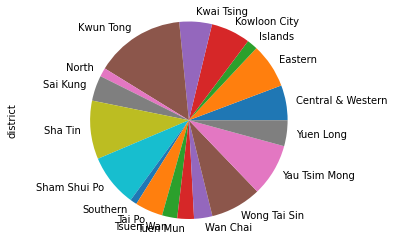

In [22]:
# Data Exploratory and Visualization. Group by district & cases count and then present in pie chart.
df4.district.groupby(df4.district).count().plot(kind='pie')
plt.axis('equal')
plt.show()

In [10]:
# Read source data "Details of probable/confirmed cases of COVID-19 infection in Hong Kong (English)".
csv_file = './data/enhanced_sur_covid_19_eng.csv'
df5 = pd.read_csv(csv_file)
df5.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [12]:
# Data Exploratory and Wrangling
df5.columns = ['case_no','report_date','date_of_onset','gender','age','name_of_hospital_admitted',
              'hospitalised_discharged_deceased','hk_nonhk_resident','case_classification','confirmed_probable']
df5.head()

,case_no,report_date,date_of_onset,gender,age,name_of_hospital_admitted,hospitalised_discharged_deceased,hk_nonhk_resident,case_classification,confirmed_probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [13]:
# Chanage report_date column to datetime data type
df5['report_date'] = pd.to_datetime(df5['report_date'], format='%d/%m/%Y')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case_no                           8482 non-null   int64         
 1   report_date                       8482 non-null   datetime64[ns]
 2   date_of_onset                     8482 non-null   object        
 3   gender                            8482 non-null   object        
 4   age                               8482 non-null   int64         
 5   name_of_hospital_admitted         0 non-null      float64       
 6   hospitalised_discharged_deceased  8482 non-null   object        
 7   hk_nonhk_resident                 8482 non-null   object        
 8   case_classification               8482 non-null   object        
 9   confirmed_probable                8482 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), obje

In [15]:
# Patch data to address case sensitive issue.
df5['hk_nonhk_resident'] = df5['hk_nonhk_resident'].str.replace('HK resident','HK Resident')
df5['hk_nonhk_resident'] = df5['hk_nonhk_resident'].str.replace('Non-HK resident','Non-HK Resident')
df5.groupby(["hk_nonhk_resident"])["hk_nonhk_resident"].count()

hk_nonhk_resident
HK Resident        8167
Non-HK Resident     314
Pending               1
Name: hk_nonhk_resident, dtype: int64

In [70]:
# Join 2 table as combined view. df4a only have four columns district, building_name,
# last_date_of_residence_of_the_case, related_probable_confirmed_cases, it does not have case details.
# Case details information is under df5. Their common reference-able value is case number.
df4a_df5_inner = pd.merge(left=df4a, right=df5, left_on='related_probable_confirmed_cases', right_on='case_no')
df4a_df5_inner.shape
df4a_df5_inner

,district,building_name,last_date_of_residence_of_the_case,related_probable_confirmed_cases,case_no,report_date,date_of_onset,gender,age,name_of_hospital_admitted,hospitalised_discharged_deceased,hk_nonhk_resident,case_classification,confirmed_probable
0,Tsuen Wan,Sam Tung Uk Village,NaT,7293,7293,2020-12-11,10/12/2020,M,63,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
1,Kowloon City,Merrington Mansion,NaT,7294,7294,2020-12-11,Asymptomatic,F,38,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
2,Sham Shui Po,Pei Ho Building,NaT,7296,7296,2020-12-11,Asymptomatic,M,24,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
3,Tai Po,"Wan Loi House, Wan Tau Tong Estate",NaT,7297,7297,2020-12-11,09/12/2020,M,62,NaN,Discharged,HK Resident,Local case,Confirmed
4,Tai Po,Tai Po Hui Market (non-residential),2020-12-10,7297,7297,2020-12-11,09/12/2020,M,62,NaN,Discharged,HK Resident,Local case,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,Sha Tin,Lung Hang Market (non-residential),2020-12-19,5909,5909,2020-11-26,24/11/2020,F,67,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
1948,Sha Tin,Lung Hang Market (non-residential),2020-12-19,6778,6778,2020-12-05,23/11/2020,M,73,NaN,Discharged,HK Resident,Local case,Confirmed
1949,Sha Tin,Lung Hang Market (non-residential),2020-12-19,7286,7286,2020-12-10,05/12/2020,F,78,NaN,Discharged,HK Resident,Local case,Confirmed
1950,Wong Tai Sin,Ngau Chi Wan Municipal Services Building (non-...,2020-12-19,6882,6882,2020-12-06,03/12/2020,M,75,NaN,Discharged,HK Resident,Local case,Confirmed


In [72]:
# Filer district column and only showing 'Tai Po' district.
tai_po = df4a_df5_inner[df4a_df5_inner['district']=='Tai Po']
tai_po.shape
tai_po

,district,building_name,last_date_of_residence_of_the_case,related_probable_confirmed_cases,case_no,report_date,date_of_onset,gender,age,name_of_hospital_admitted,hospitalised_discharged_deceased,hk_nonhk_resident,case_classification,confirmed_probable
3,Tai Po,"Wan Loi House, Wan Tau Tong Estate",NaT,7297,7297,2020-12-11,09/12/2020,M,62,NaN,Discharged,HK Resident,Local case,Confirmed
4,Tai Po,Tai Po Hui Market (non-residential),2020-12-10,7297,7297,2020-12-11,09/12/2020,M,62,NaN,Discharged,HK Resident,Local case,Confirmed
6,Tai Po,"Kwong Ping House, Kwong Fuk Estate",NaT,7299,7299,2020-12-11,Asymptomatic,M,57,NaN,Discharged,HK Resident,Local case,Confirmed
30,Tai Po,"Kwong Wai House, Kwong Fuk Estate",NaT,7323,7323,2020-12-11,08/12/2020,M,64,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
61,Tai Po,"Tower 5, Phase 2, Centra Horizon",NaT,7351,7351,2020-12-11,08/12/2020,M,41,NaN,Discharged,HK Resident,Local case,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,Tai Po,Treasure Garden Oi-Shi-Sushi (non-residential),2020-12-06,7289,7289,2020-12-10,08/12/2020,M,35,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
1880,Tai Po,Treasure Garden Oi-Shi-Sushi (non-residential),2020-12-06,7290,7290,2020-12-10,07/12/2020,F,37,NaN,Discharged,HK Resident,Local case,Confirmed
1907,Tai Po,Tai Po Hui Market (non-residential),2020-12-10,6042,6042,2020-11-28,23/11/2020,F,65,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
1908,Tai Po,Tai Po Hui Market (non-residential),2020-12-10,6458,6458,2020-12-02,Asymptomatic,M,65,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed


In [105]:
# As df4a is "Residential buildings in which probable/confirmed cases have resided in the past 14 days 
# or non-residential building with 2 or more probable/confirmed cases in the past 14 days (English)", that's mean 
# only contain past 14 days of data, not all from day 0. But df5 is "Details of probable/confirmed cases of 
# COVID-19 infection in Hong Kong (English)", it included all cases number details from day 0.
# So, let's filter past 14 days of data and make new datafame.
tai_po_14 = tai_po[tai_po.report_date > datetime.datetime.now() - pd.to_timedelta("14day")]
tai_po_14

,district,building_name,last_date_of_residence_of_the_case,related_probable_confirmed_cases,case_no,report_date,date_of_onset,gender,age,name_of_hospital_admitted,hospitalised_discharged_deceased,hk_nonhk_resident,case_classification,confirmed_probable
823,Tai Po,Tai Hang Garden,NaT,7873,7873,2020-12-17,Asymptomatic,F,82,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
882,Tai Po,Fung Nin Building,NaT,7910,7910,2020-12-18,Asymptomatic,F,52,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
945,Tai Po,Maxim's Food Factory (non-residential),2020-12-15,7951,7951,2020-12-18,14/12/2020,F,58,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
951,Tai Po,"Wah Cheong Court, Fortune Plaza",NaT,7954,7954,2020-12-18,30/11/2020,F,85,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
1002,Tai Po,"Tower 7, Solaria",NaT,7987,7987,2020-12-19,13/12/2020,F,33,NaN,Hospitalised,HK Resident,Local case,Confirmed
1003,Tai Po,G/F Eightland Gardens (non-residential),2020-12-12,7987,7987,2020-12-19,13/12/2020,F,33,NaN,Hospitalised,HK Resident,Local case,Confirmed
1008,Tai Po,Fu Heng Shopping Centre Carnival Seafood Resta...,2020-12-16,7990,7990,2020-12-19,15/12/2020,M,37,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
1009,Tai Po,Fortune Plaza 龍廷薈酒家 (non-residential),2020-12-16,7990,7990,2020-12-19,15/12/2020,M,37,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
1049,Tai Po,Tseng Tau Village,NaT,8021,8021,2020-12-19,14/12/2020,M,35,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
1083,Tai Po,"Heng Tai House, Fu Heng Estate",NaT,8043,8043,2020-12-19,09/12/2020,M,25,NaN,Discharged,HK Resident,Local case,Confirmed


In [106]:
# Check shape of new created dataframe, 26 rows & 14 columns.
tai_po_14.shape

(26, 14)

In [109]:
# By quick eyeball checking, there are duplicate number in case_no column. By check, there are 3 duplicate
# pair. But interesting, these duplicate records are under different building name.
len(tai_po_14['case_no'])-len(tai_po_14['case_no'].drop_duplicates())

3

In [98]:
# Select necessary columns for analysis.
tai_po_15_unique_a = tai_po_15_unique[['district','building_name','case_no','report_date','gender','age',
                                       'hospitalised_discharged_deceased','hk_nonhk_resident',
                                       'case_classification','confirmed_probable']]
tai_po_15_unique_a

,district,building_name,case_no,report_date,gender,age,hospitalised_discharged_deceased,hk_nonhk_resident,case_classification,confirmed_probable
646,Tai Po,Wong Yue Tan Tsuen,7768,2020-12-16,M,50,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
823,Tai Po,Tai Hang Garden,7873,2020-12-17,F,82,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
882,Tai Po,Fung Nin Building,7910,2020-12-18,F,52,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
945,Tai Po,Maxim's Food Factory (non-residential),7951,2020-12-18,F,58,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
951,Tai Po,"Wah Cheong Court, Fortune Plaza",7954,2020-12-18,F,85,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
1049,Tai Po,Tseng Tau Village,8021,2020-12-19,M,35,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
1099,Tai Po,Nam Hang Tsuen,8053,2020-12-19,F,46,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
1105,Tai Po,"Sun Wo House, Tai Wo Estate",8058,2020-12-19,M,40,Hospitalised,HK Resident,Local case,Confirmed
1114,Tai Po,6 Wai Yan Street,8064,2020-12-19,M,41,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed
1185,Tai Po,"Shin Lun House, Fu Shin Estate",8118,2020-12-20,F,27,Hospitalised,HK Resident,Local case,Confirmed


<AxesSubplot:ylabel='building_name'>

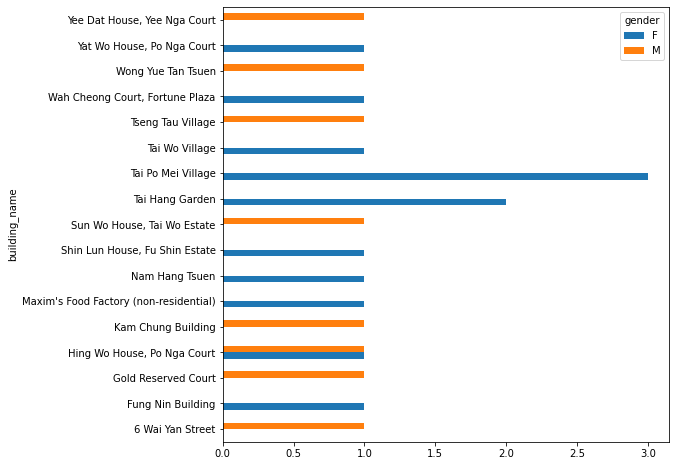

In [102]:
# Data Exploratory and Visualization. Group by gender & hk_nonhk_resident and count number of cases 
# and then present in bar chart.
pd.crosstab(tai_po_15_unique_a['building_name'],tai_po_15_unique_a['gender']).plot.barh(figsize=(8,8))